## Exercise 10 - Decision tree

- Use the same dataset as in previous exercises (voice.csv)
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called decision tree for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. Filter dataframe for meanfun and IQR columns only.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.patches as mpatches

data = pd.read_csv("data_files/voice.csv", delimiter=",")
data_filtered = data[["meanfun", "IQR"]]
y = data["label"]

2 Divide the data with the following portions:
   - Training data 70 %
   - Test data 30 %

In [20]:
X = data_filtered
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

3 Define classifier without the max_depth parameter. Use get_depth() method for the defined classifier. What value for tree depth was chosen automatically?

In [21]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

tree_depth = clf.get_depth()
print(f"Automatically chosen tree depth: {tree_depth}")

Automatically chosen tree depth: 15


4 Visualise the tree structure and create the confusion matrix where you can compare true and predicted labels.

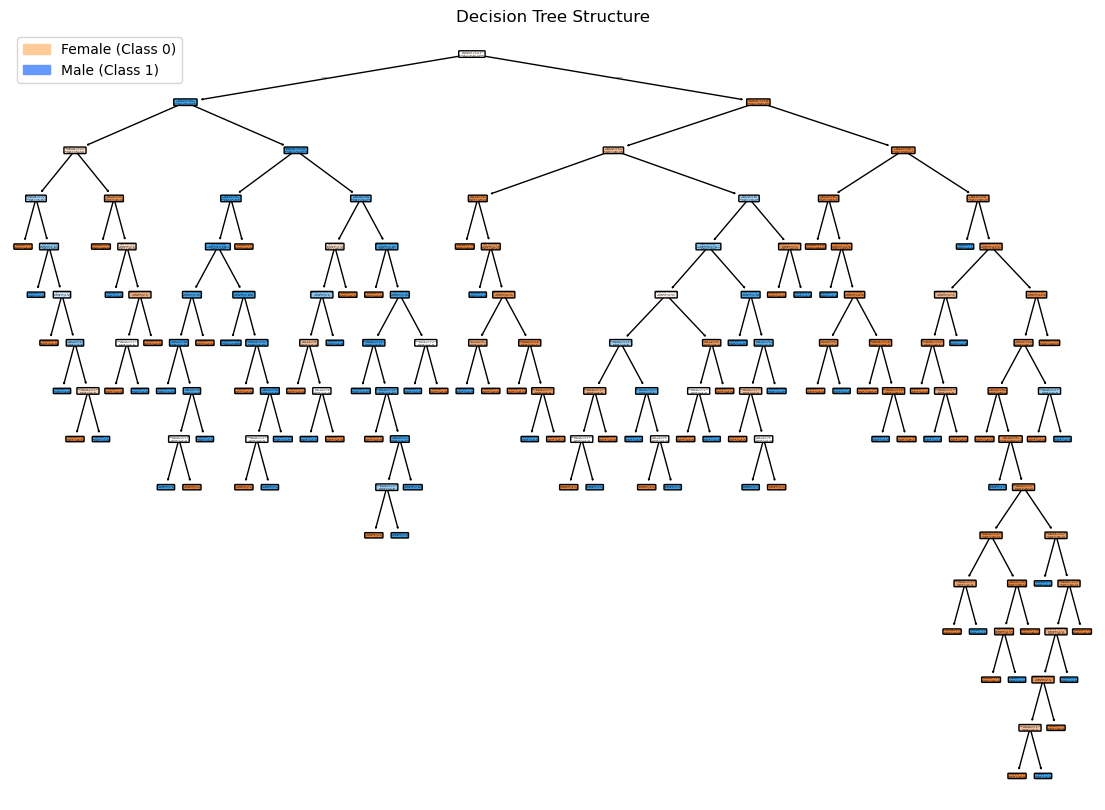

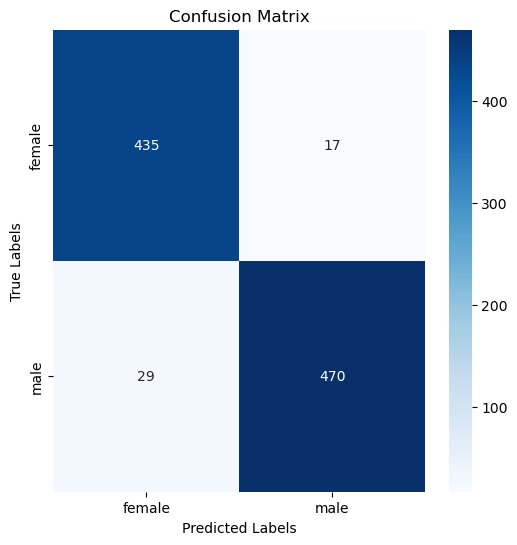

In [22]:
plt.figure(figsize=(14,10))
plot_tree(
    clf, 
    filled=True, 
    feature_names=["meanfun", "IQR"], 
    class_names=["female", "male"], 
    rounded=True,
    impurity=False,
    precision=2)

female_patch = mpatches.Patch(color="#ffcc99", label="Female (Class 0)")  # Light orange for female
male_patch = mpatches.Patch(color="#6699ff", label="Male (Class 1)")  # Light blue for male
plt.legend(handles=[female_patch, male_patch], loc='upper left')

plt.title("Decision Tree Structure")
plt.show()

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["female", "male"], yticklabels=["female", "male"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()